
### Performing EDA on the World Population Countrywise Data


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

Reading the csv files

In [2]:
data = pd.read_csv("C://Users//shri//Data_Science//Prodigy_Internship//API_SP.POP.TOTL_DS2_en_csv_v2_3401680//API_SP.POP.TOTL_DS2_en_csv_v2_3401680.csv", skiprows = 4  )
metadata_country = pd.read_csv("C://Users//shri//Data_Science//Prodigy_Internship//API_SP.POP.TOTL_DS2_en_csv_v2_3401680//Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3401680.csv" )
metadata_indicator = pd.read_csv("C://Users//shri//Data_Science//Prodigy_Internship//API_SP.POP.TOTL_DS2_en_csv_v2_3401680//Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_3401680.csv")

In [3]:
data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [5]:
data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,0.0
mean,1.157939e+08,1.173869e+08,1.195401e+08,1.222050e+08,1.248922e+08,1.276182e+08,1.304676e+08,1.333152e+08,1.362430e+08,1.392759e+08,...,2.986442e+08,3.024871e+08,3.063370e+08,3.101259e+08,3.138348e+08,3.174293e+08,3.206783e+08,3.236218e+08,3.269710e+08,NaN
std,3.639920e+08,3.684672e+08,3.751049e+08,3.837174e+08,3.923714e+08,4.011556e+08,4.104328e+08,4.196670e+08,4.291879e+08,4.390998e+08,...,9.336474e+08,9.448081e+08,9.559803e+08,9.668651e+08,9.774204e+08,9.875137e+08,9.965683e+08,1.004474e+09,1.013469e+09,NaN
min,2.646000e+03,2.888000e+03,3.171000e+03,3.481000e+03,3.811000e+03,4.161000e+03,4.531000e+03,4.930000e+03,5.354000e+03,5.646000e+03,...,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04,1.139600e+04,NaN
25%,5.132212e+05,5.231345e+05,5.337595e+05,5.449288e+05,5.566630e+05,5.651150e+05,5.691470e+05,5.773872e+05,5.832700e+05,5.875942e+05,...,1.788196e+06,1.777557e+06,1.791003e+06,1.797085e+06,1.788878e+06,1.790133e+06,1.786038e+06,1.768086e+06,1.756374e+06,NaN
50%,3.708088e+06,3.816540e+06,3.931214e+06,4.033994e+06,4.112910e+06,4.194930e+06,4.257383e+06,4.317222e+06,4.410692e+06,4.515734e+06,...,1.035808e+07,1.032545e+07,1.030030e+07,1.039533e+07,1.044767e+07,1.060623e+07,1.050577e+07,1.048694e+07,1.059380e+07,NaN
75%,2.670606e+07,2.748694e+07,2.830289e+07,2.914708e+07,3.001684e+07,3.084892e+07,3.163010e+07,3.209247e+07,3.249927e+07,3.277149e+07,...,6.073058e+07,6.062750e+07,6.053671e+07,6.042176e+07,5.987258e+07,6.170452e+07,6.358833e+07,6.549775e+07,6.743811e+07,NaN
max,3.031517e+09,3.072470e+09,3.126894e+09,3.193470e+09,3.260480e+09,3.328243e+09,3.398510e+09,3.468395e+09,3.540186e+09,3.614593e+09,...,7.404251e+09,7.490956e+09,7.577110e+09,7.661178e+09,7.742725e+09,7.821272e+09,7.888964e+09,7.951595e+09,8.024997e+09,NaN


There is a column name Unnamed:68 which contains only Null values. This column is result of row index which was not taken care during writing of data into memory. Dropping this column

In [6]:
data.drop(columns = ['Unnamed: 68'] , inplace = True)

This CSV File contains the Total popolation data of 266 countries from 1960 to 2023. But there are 195 countries according to wikkipedia. We will see later what are the other rows. 

In [7]:
#Lets see metadata_country
metadata_country.head(5)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [8]:
##dropping unnamed:5
metadata_country.drop(columns = ['Unnamed: 5'] , inplace = True)

This csv contains description of Country Codes like to which region that country belongs, IncomeGroup, SpecialNote, Table name

In [9]:
## :Let's see metadata of indicator
metadata_indicator.head(5)

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,NaN


In [10]:
##dropping unnamed:5
metadata_indicator.drop(columns = ['Unnamed: 4'] , inplace = True)

This csv file contains description about indicators

In [11]:
metadata_indicator.SOURCE_NOTE[0]

'Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.'

In [12]:
metadata_indicator.SOURCE_ORGANIZATION[0]

'(1) United Nations Population Division. World Population Prospects: 2022 Revision; (2) Statistical databases and publications from national statistical offices; (3) Eurostat: Demographic Statistics; (4) United Nations Statistics Division. Population and Vital Statistics Reprot (various years).'

## Now lets first analyse the country data

Let's see the duplicates in the categorical variables

In [14]:
data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [15]:
#Lets see how many unique values below columns have
columns = ['Country Name' , 'Country Code','Indicator Name',    'Indicator Code']
data[columns].nunique(axis = 0)

Country Name      266
Country Code      266
Indicator Name      1
Indicator Code      1
dtype: int64

All the country name and country codes are unique and Indicator name and indicator code are sam. Lets drop these columns

In [16]:
data.drop(columns = ['Indicator Name' , 'Indicator Code'] , inplace = True)

In [17]:
data.head(5)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


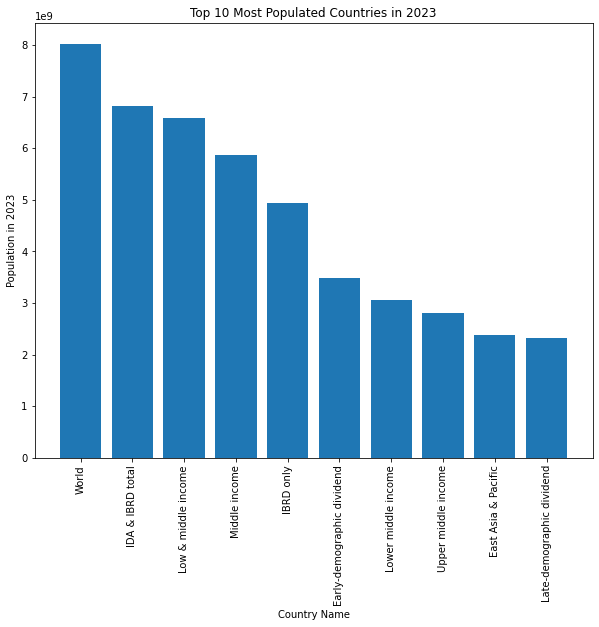

In [18]:
#Lets see what are the top 10 populated countries in 2023
plt.figure(figsize = (10,8))
data_mostpopulated_2023 = data.sort_values('2023' , ascending = False).head(10)[['Country Name' ,'2023']]
plt.bar(data_mostpopulated_2023['Country Name'] , data_mostpopulated_2023['2023'])
plt.xticks(rotation = 90)
plt.xlabel('Country Name')
plt.ylabel('Population in 2023')
plt.title('Top 10 Most Populated Countries in 2023')

# Displaying the plot
plt.show()

We can see that the csv not only contains the population of countries but also contains the total population of of different sectors. Let's see the top 20 populated organisation or countries in world 

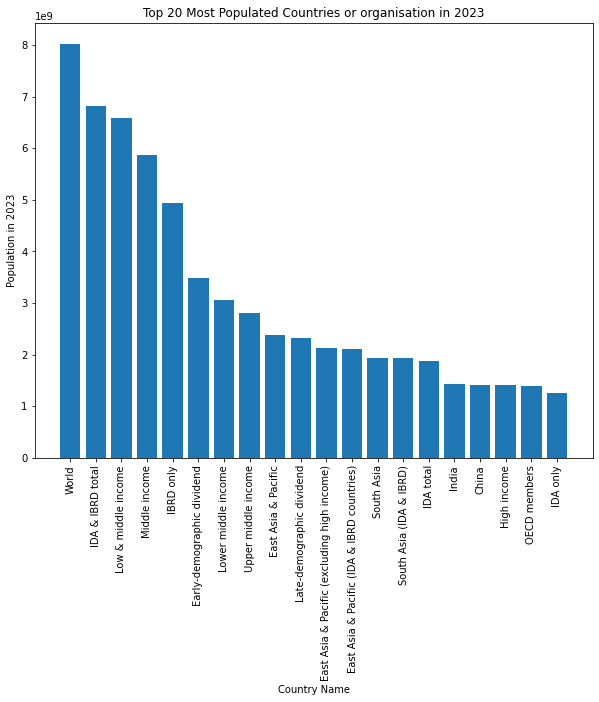

In [19]:
plt.figure(figsize = (10,8))
data_mostpopulated_2023 = data.sort_values('2023' , ascending = False).head(20)[['Country Name' ,'2023']]
plt.bar(data_mostpopulated_2023['Country Name'] , data_mostpopulated_2023['2023'])
plt.xticks(rotation = 90)
plt.xlabel('Country Name')
plt.ylabel('Population in 2023')
plt.title('Top 20 Most Populated Countries or organisation in 2023')

# Displaying the plot
plt.show()

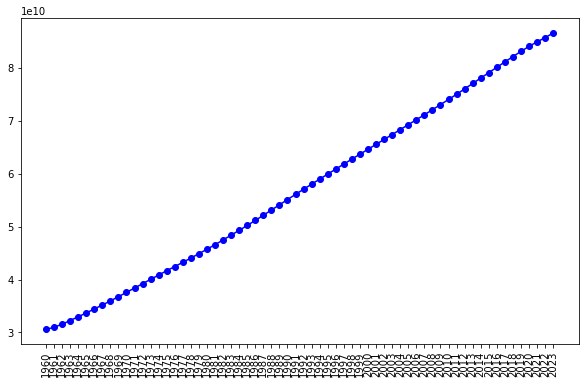

In [60]:
year_columns = [col for col in data.columns if col.isdigit()]

# Sum the population for each year across all countries to get world population
world_population_growth = data[year_columns].sum()

# Plot the world population growth over time
plt.figure(figsize=(10, 6))
plt.xticks(rotation = 90)
plt.plot(year_columns, world_population_growth, marker='o', color='blue')

We can see that the growth of the world population is linear

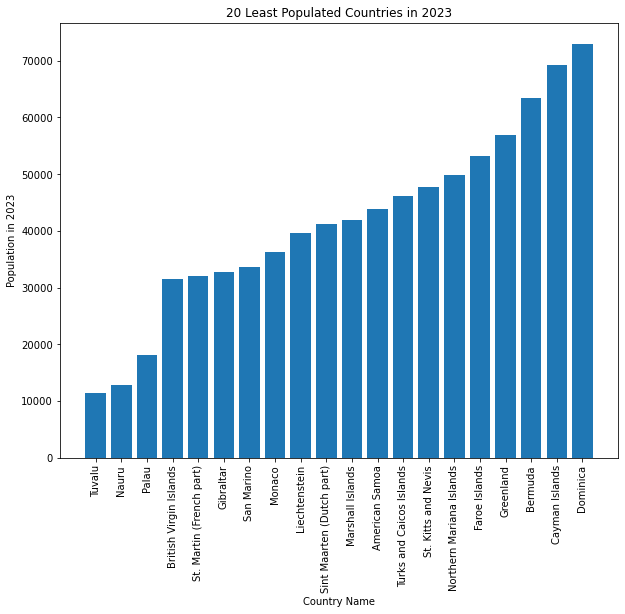

In [20]:
## Lets see 20 countries or organisations with lowest population in 2023
plt.figure(figsize = (10,8))
data_leastpopulated_2023 = data.sort_values('2023' , ascending = True).head(20)[['Country Name' ,'2023']]
plt.bar(data_leastpopulated_2023['Country Name'] , data_leastpopulated_2023['2023'])
plt.xticks(rotation = 90)
plt.xlabel('Country Name')
plt.ylabel('Population in 2023')
plt.title('20 Least Populated Countries in 2023')

# Displaying the plot
plt.show()

In [21]:
## Now see which coutry or organisation has shown maximum or minimum growth over the period of 1960 to 2023. But before 
## Preceeding lets first fill the nan values. From above we can see that two countries have no population data before 1989
## we will try the fill the null valuea by subtracting the average population growth per year from the 1989 population data

In [22]:
##First lets see which countries have nan values

In [23]:
mask = data.isnull().any(axis = 1)
data[mask]

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
110,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0,4922749.0,5043612.0,5165775.0


We can see that the Not Classified category contains null values for all years and West Bank and Gaza contains null till 1989. Lets drop the Not_Classified

In [24]:
i = data[((data['Country Name'] == 'Not classified'))].index
data.drop(i , inplace = True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 265
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  265 non-null    object 
 1   Country Code  265 non-null    object 
 2   1960          264 non-null    float64
 3   1961          264 non-null    float64
 4   1962          264 non-null    float64
 5   1963          264 non-null    float64
 6   1964          264 non-null    float64
 7   1965          264 non-null    float64
 8   1966          264 non-null    float64
 9   1967          264 non-null    float64
 10  1968          264 non-null    float64
 11  1969          264 non-null    float64
 12  1970          264 non-null    float64
 13  1971          264 non-null    float64
 14  1972          264 non-null    float64
 15  1973          264 non-null    float64
 16  1974          264 non-null    float64
 17  1975          264 non-null    float64
 18  1976          264 non-null    

In [26]:
## Lets fill the nan value for the null values of west bank of gaza from the next not nan value
data_filled = data.apply(lambda row: row.fillna(method='bfill'), axis=1)


Now lets look for some insights in the dataframe

C:\Users\shri\AppData\Local\Temp\ipykernel_13348\3704505050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_growth['1960'] = pd.to_numeric(data_growth['1960'], errors='coerce')
C:\Users\shri\AppData\Local\Temp\ipykernel_13348\3704505050.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_growth['2023'] = pd.to_numeric(data_growth['2023'], errors='coerce')
C:\Users\shri\AppData\Local\Temp\ipykernel_13348\3704505050.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

Country with the highest population growth: Qatar
Growth Rate: 7365.69%


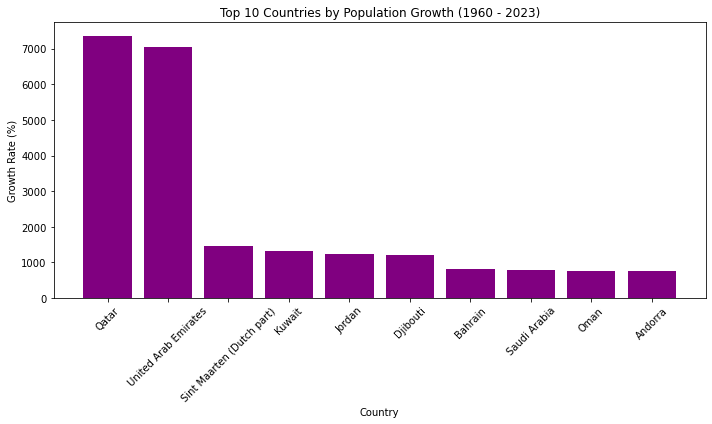

In [30]:
data_growth = data[['Country Name', '1960', '2023']]

# Convert population columns to numeric values
data_growth['1960'] = pd.to_numeric(data_growth['1960'], errors='coerce')
data_growth['2023'] = pd.to_numeric(data_growth['2023'], errors='coerce')

# Calculate the growth rate: (Population in 2023 - Population in 2020) / Population in 2020
data_growth['Growth Rate (%)'] = ((data_growth['2023'] - data_growth['1960']) / data_growth['1960']) * 100

# Identify the country with the highest growth rate
highest_growth_country = data_growth.loc[data_growth['Growth Rate (%)'].idxmax()]

# Display the country with the highest growth
print(f"Country with the highest population growth: {highest_growth_country['Country Name']}")
print(f"Growth Rate: {highest_growth_country['Growth Rate (%)']:.2f}%")

# Visualize the top 10 countries by population growth
top_10_growth = data_growth.nlargest(10, 'Growth Rate (%)')

plt.figure(figsize=(10, 6))
plt.bar(top_10_growth['Country Name'], top_10_growth['Growth Rate (%)'], color='purple')
plt.title('Top 10 Countries by Population Growth (1960 - 2023)')
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The growth rate of the Qatar is the highest followed by United Arab Emirates

Country with the lowest population growth: Bulgaria
Growth Rate: -18.27%


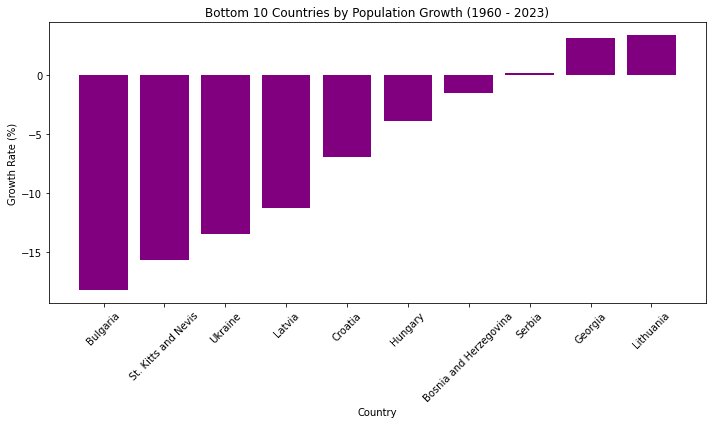

In [31]:
##Lets see the countries with lowest growth rate

lowest_growth_country = data_growth.loc[data_growth['Growth Rate (%)'].idxmin()]

# Display the country with the highest growth
print(f"Country with the lowest population growth: {lowest_growth_country['Country Name']}")
print(f"Growth Rate: {lowest_growth_country['Growth Rate (%)']:.2f}%")

# Visualize the top 10 countries by population growth
lowest_10_growth = data_growth.nsmallest(10, 'Growth Rate (%)')

plt.figure(figsize=(10, 6))
plt.bar(lowest_10_growth['Country Name'], lowest_10_growth['Growth Rate (%)'], color='purple')
plt.title('Bottom 10 Countries by Population Growth (1960 - 2023)')
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bulgaria has showl 18 percent decline in population followed by ST. Kitts and Nevis which has 15 percent decline

Let's see the population change in the Bulgaria and Qatar along the years

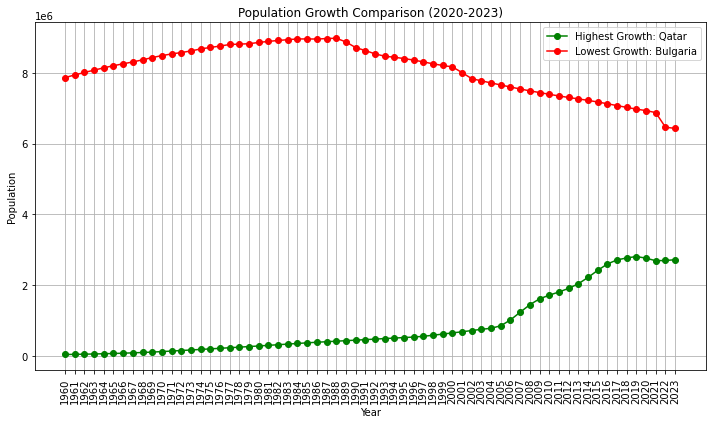

In [46]:
# Select the top 1 country with the highest growth rate
highest_growth_country = data_growth.loc[data_growth['Growth Rate (%)'].idxmax()]

# Select the top 1 country with the lowest growth rate
lowest_growth_country = data_growth.loc[data_growth['Growth Rate (%)'].idxmin()]

# Extract population data for 2020 to 2023 for both countries
years = [col for col in data.columns if col.isdigit() and int(col) >= 1960 and int(col) <= 2023]

# Highest growth country's population over the years
highest_growth_pop = data.loc[data['Country Name'] == highest_growth_country['Country Name'], years].values.flatten()

# Lowest growth country's population over the years
lowest_growth_pop = data.loc[data['Country Name'] == lowest_growth_country['Country Name'], years].values.flatten()

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Line for the highest growth country
plt.plot(years, highest_growth_pop, marker='o', label=f'Highest Growth: {highest_growth_country["Country Name"]}', color='green')

# Line for the lowest growth country
plt.plot(years, lowest_growth_pop, marker='o', label=f'Lowest Growth: {lowest_growth_country["Country Name"]}', color='red')

# Adding titles and labels
plt.title('Population Growth Comparison (2020-2023)')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.ylabel('Population')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Let's merge the two dataset

In [52]:
# Merging population data with metadata based on the 'Country Code'
merged_data = pd.merge(data, metadata_country, how='left', left_on='Country Code', right_on='Country Code')

# Display the first few rows of the merged dataset
merged_data.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2018,2019,2020,2021,2022,2023,Region,IncomeGroup,SpecialNotes,TableName
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,Latin America & Caribbean,High income,NaN,Aruba
1,Africa Eastern and Southern,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,Afghanistan,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,Africa Western and Central,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,Angola,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


Let's do some analysis on this merged dataset

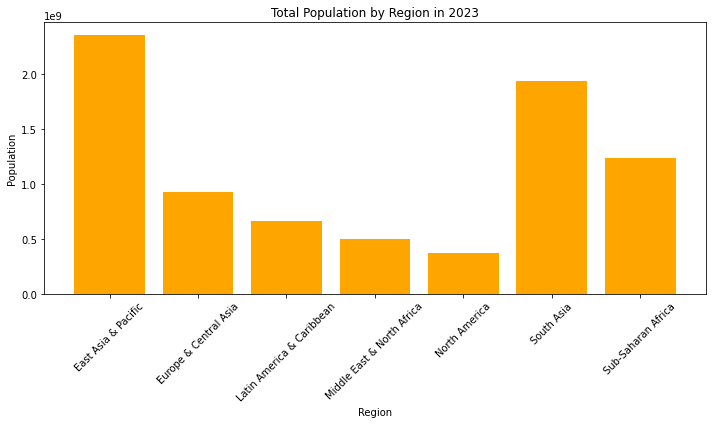

In [54]:
# Aggregating population by region for the year 2023
region_population_2023 = merged_data.groupby('Region')['2023'].sum().reset_index()

# Plotting population by region
plt.figure(figsize=(10, 6))
plt.bar(region_population_2023['Region'], region_population_2023['2023'], color='orange')
plt.title('Total Population by Region in 2023')
plt.xlabel('Region')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The East Asia & Pacific are most populated region followed by South Asia. North America is the least populated region in 2023

Let's analyse the population growth by income group

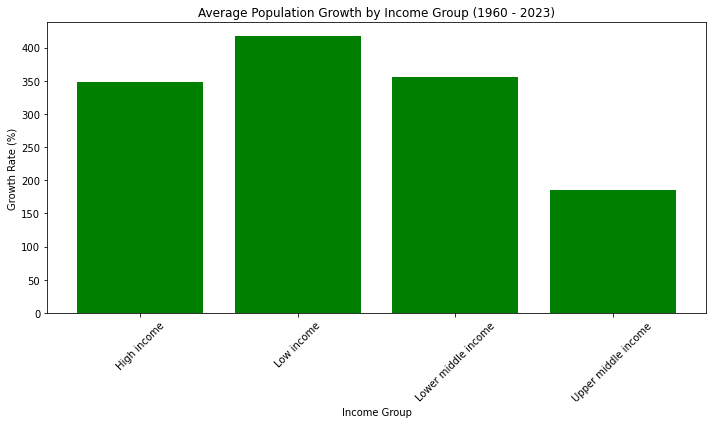

In [56]:
# Calculate population growth between 2020 and 2023
merged_data['Growth Rate (%)'] = ((merged_data['2023'] - merged_data['1960']) / merged_data['1960']) * 100

# Aggregate by income group
income_group_growth = merged_data.groupby('IncomeGroup')['Growth Rate (%)'].mean().reset_index()

# Plotting the growth rate by income group
plt.figure(figsize=(10, 6))
plt.bar(income_group_growth['IncomeGroup'], income_group_growth['Growth Rate (%)'], color='green')
plt.title('Average Population Growth by Income Group (1960 - 2023)')
plt.xlabel('Income Group')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see that from 1960 to 2023 the population of low income people has increased by 400 percent whereas the population of the upper middle has increased by 180 percent only.  

Lets see top 5 countries in each region by growth rate

In [57]:
# Finding top 5 countries by growth in each region
top_growth_countries_by_region = merged_data.groupby('Region').apply(lambda x: x.nlargest(5, 'Growth Rate (%)')).reset_index(drop=True)

# Displaying top growing countries by region
top_growth_countries_by_region[['Country Name', 'Region', 'Growth Rate (%)']]


,Country Name,Region,Growth Rate (%)
0,Northern Mariana Islands,East Asia & Pacific,472.236268
1,Solomon Islands,East Asia & Pacific,454.874101
2,Brunei Darussalam,East Asia & Pacific,430.222858
3,Papua New Guinea,East Asia & Pacific,420.225003
4,Vanuatu,East Asia & Pacific,417.747028
5,Andorra,Europe & Central Asia,748.120301
6,Tajikistan,Europe & Central Asia,375.777723
7,Uzbekistan,Europe & Central Asia,334.913968
8,Turkmenistan,Europe & Central Asia,306.734613
9,Kyrgyz Republic,Europe & Central Asia,226.879344


Let's see the population distribution 

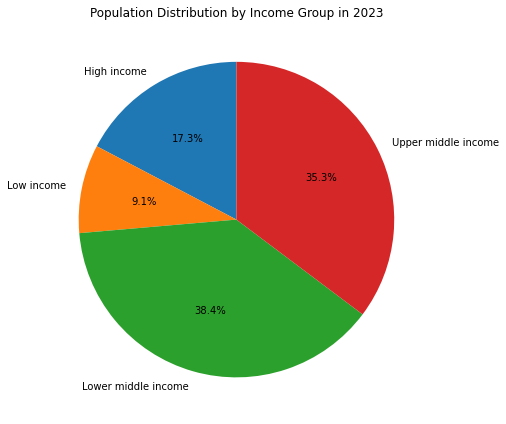

In [58]:
# Aggregating population by income group for 2023
income_group_population_2023 = merged_data.groupby('IncomeGroup')['2023'].sum().reset_index()

# Plotting population distribution by income group
plt.figure(figsize=(10, 6))
plt.pie(income_group_population_2023['2023'], labels=income_group_population_2023['IncomeGroup'], autopct='%1.1f%%', startangle=90)
plt.title('Population Distribution by Income Group in 2023')
plt.tight_layout()
plt.show()


We can see that most of the people are from lower middle income and least are from low income group.